<a href="https://colab.research.google.com/github/simrangawri/covid---19-time-series-analysis/blob/master/Gurgaon_AC_power_consumption_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/AC_Data (1).csv")
df.set_index("0")

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
2019-09-30 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647


In [107]:
df["0"]

0        2019-08-01 00:00:00
1        2019-08-01 00:01:00
2        2019-08-01 00:02:00
3        2019-08-01 00:03:00
4        2019-08-01 00:04:00
                ...         
87835    2019-09-30 23:55:00
87836    2019-09-30 23:56:00
87837    2019-09-30 23:57:00
87838    2019-09-30 23:58:00
87839    2019-09-30 23:59:00
Name: 0, Length: 87840, dtype: object

In [108]:
df = df.dropna(thresh=18)
df.shape

(35530, 19)

In [109]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


###we have removed all the null values from our dataset.

In [110]:
df.isnull().sum()

0        0
AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64

###resampling our data from minutes to hourly basis

In [111]:
from pandas.errors import InvalidIndexError
#df['0'] =  pd.to_datetime(df['0'], infer_datetime_format=True)
#df['0'].resample('H').mean()
df['date'] = pd.to_datetime(df['0']).dt.date
df['Time'] = pd.to_datetime(df['0']).dt.time
format = '%Y-%m-%d %H:%M:%S'
#df['Datetime'] = pd.to_datetime(df['date'].astype("string") + ' ' + df['time'].astype("string"), format=format)
df['Datetime'] = pd.to_datetime(df['date'].astype("string")+ " " + df['Time'].astype("string"), format=format)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
%matplotlib inline
#df["AC"]=df["AC 1"].astype("int64")
newdf=df.resample('H').mean()
newdf


,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Datetime,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,6.841507,8.501703,1.801855,0.975186,2.232007,4.302977,2.677340,4.825840,3.652807,2.555998,1.652069,2.015612,4.692998,5.199325,5.651866,4.244085,2.632695,5.172505
2019-08-01 01:00:00,7.407684,8.459075,1.490131,1.842207,2.236677,4.314749,2.610280,4.463227,3.053721,2.658946,1.366532,1.887252,5.108711,5.699031,5.942294,4.612226,2.580214,3.970979
2019-08-01 02:00:00,7.350885,8.113246,1.482323,1.465390,1.991346,4.216204,2.753061,3.801375,3.115622,2.803299,1.528281,1.919976,4.034610,5.022749,6.213989,5.267167,2.734928,3.949934
2019-08-01 03:00:00,6.639281,7.923313,2.238207,1.440677,2.091048,4.734834,3.044784,3.895697,2.844864,2.731836,1.121758,1.670987,4.400518,5.034446,4.935977,5.001503,4.238698,3.898287
2019-08-01 04:00:00,6.597653,7.300900,1.744991,2.547984,1.872143,3.600600,2.918532,3.768754,3.383187,2.597658,1.206639,1.836803,3.972867,4.283286,5.323463,4.811916,4.192009,3.937752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 19:00:00,2.343774,5.745903,2.344854,1.748236,0.799001,0.000000,1.564940,2.272784,1.364234,0.860074,1.426235,1.934039,3.352049,2.078573,2.966439,1.649263,4.656103,7.298228
2019-09-30 20:00:00,2.247158,7.227569,2.721555,1.307305,0.734873,0.222064,2.451261,2.398853,2.712553,1.228883,1.131552,2.021017,4.251383,2.501437,2.978893,1.356695,4.659106,7.343443
2019-09-30 21:00:00,2.248779,5.412634,2.973793,1.466146,0.739112,0.000000,2.851494,2.143772,3.187179,1.429614,1.586310,2.481487,3.262311,1.923922,3.181391,1.402617,4.563994,7.187656


In [112]:
newdf.reset_index()

,Datetime,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,6.841507,8.501703,1.801855,0.975186,2.232007,4.302977,2.677340,4.825840,3.652807,2.555998,1.652069,2.015612,4.692998,5.199325,5.651866,4.244085,2.632695,5.172505
1,2019-08-01 01:00:00,7.407684,8.459075,1.490131,1.842207,2.236677,4.314749,2.610280,4.463227,3.053721,2.658946,1.366532,1.887252,5.108711,5.699031,5.942294,4.612226,2.580214,3.970979
2,2019-08-01 02:00:00,7.350885,8.113246,1.482323,1.465390,1.991346,4.216204,2.753061,3.801375,3.115622,2.803299,1.528281,1.919976,4.034610,5.022749,6.213989,5.267167,2.734928,3.949934
3,2019-08-01 03:00:00,6.639281,7.923313,2.238207,1.440677,2.091048,4.734834,3.044784,3.895697,2.844864,2.731836,1.121758,1.670987,4.400518,5.034446,4.935977,5.001503,4.238698,3.898287
4,2019-08-01 04:00:00,6.597653,7.300900,1.744991,2.547984,1.872143,3.600600,2.918532,3.768754,3.383187,2.597658,1.206639,1.836803,3.972867,4.283286,5.323463,4.811916,4.192009,3.937752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2019-09-30 19:00:00,2.343774,5.745903,2.344854,1.748236,0.799001,0.000000,1.564940,2.272784,1.364234,0.860074,1.426235,1.934039,3.352049,2.078573,2.966439,1.649263,4.656103,7.298228
1460,2019-09-30 20:00:00,2.247158,7.227569,2.721555,1.307305,0.734873,0.222064,2.451261,2.398853,2.712553,1.228883,1.131552,2.021017,4.251383,2.501437,2.978893,1.356695,4.659106,7.343443
1461,2019-09-30 21:00:00,2.248779,5.412634,2.973793,1.466146,0.739112,0.000000,2.851494,2.143772,3.187179,1.429614,1.586310,2.481487,3.262311,1.923922,3.181391,1.402617,4.563994,7.187656
1462,2019-09-30 22:00:00,2.216879,6.630451,3.055413,1.660908,0.629124,0.772325,3.332732,3.832136,5.133002,0.964836,3.989305,2.727492,4.733191,2.185768,3.876554,1.488870,3.889504,6.484435


###we have converted hourly data into csv for other uses 

In [113]:
newdf.to_csv('hourly_data.csv')

In [114]:
hourly_data_for_two_months=pd.read_csv('/content/hourly_data.csv')

In [115]:

filt=(hourly_data_for_two_months["Datetime"]>='2019-08-01 00:00:00') & (hourly_data_for_two_months["Datetime"]<='2019-08-01 23:00:00')
hourly_data_of_a_day=hourly_data_for_two_months.loc[filt]

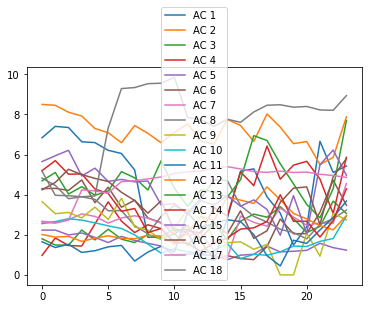

In [116]:
hourly_data_of_a_day.plot()

In [117]:
newdf.reset_index()

,Datetime,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,6.841507,8.501703,1.801855,0.975186,2.232007,4.302977,2.677340,4.825840,3.652807,2.555998,1.652069,2.015612,4.692998,5.199325,5.651866,4.244085,2.632695,5.172505
1,2019-08-01 01:00:00,7.407684,8.459075,1.490131,1.842207,2.236677,4.314749,2.610280,4.463227,3.053721,2.658946,1.366532,1.887252,5.108711,5.699031,5.942294,4.612226,2.580214,3.970979
2,2019-08-01 02:00:00,7.350885,8.113246,1.482323,1.465390,1.991346,4.216204,2.753061,3.801375,3.115622,2.803299,1.528281,1.919976,4.034610,5.022749,6.213989,5.267167,2.734928,3.949934
3,2019-08-01 03:00:00,6.639281,7.923313,2.238207,1.440677,2.091048,4.734834,3.044784,3.895697,2.844864,2.731836,1.121758,1.670987,4.400518,5.034446,4.935977,5.001503,4.238698,3.898287
4,2019-08-01 04:00:00,6.597653,7.300900,1.744991,2.547984,1.872143,3.600600,2.918532,3.768754,3.383187,2.597658,1.206639,1.836803,3.972867,4.283286,5.323463,4.811916,4.192009,3.937752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2019-09-30 19:00:00,2.343774,5.745903,2.344854,1.748236,0.799001,0.000000,1.564940,2.272784,1.364234,0.860074,1.426235,1.934039,3.352049,2.078573,2.966439,1.649263,4.656103,7.298228
1460,2019-09-30 20:00:00,2.247158,7.227569,2.721555,1.307305,0.734873,0.222064,2.451261,2.398853,2.712553,1.228883,1.131552,2.021017,4.251383,2.501437,2.978893,1.356695,4.659106,7.343443
1461,2019-09-30 21:00:00,2.248779,5.412634,2.973793,1.466146,0.739112,0.000000,2.851494,2.143772,3.187179,1.429614,1.586310,2.481487,3.262311,1.923922,3.181391,1.402617,4.563994,7.187656
1462,2019-09-30 22:00:00,2.216879,6.630451,3.055413,1.660908,0.629124,0.772325,3.332732,3.832136,5.133002,0.964836,3.989305,2.727492,4.733191,2.185768,3.876554,1.488870,3.889504,6.484435


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf1c7dced0>,
      dtype=object)

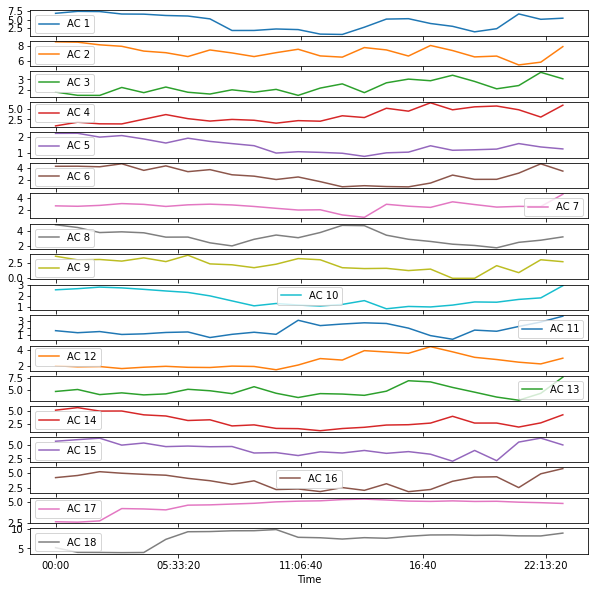

In [118]:
hourly_data_of_a_day['Time'] = pd.to_datetime(hourly_data_of_a_day['Datetime']).dt.time
hourly_data_of_a_day.plot(x="Time", y=["AC 1", "AC 2","AC 3","AC 4","AC 5","AC 6","AC 7","AC 8","AC 9","AC 10","AC 11","AC 12","AC 13","AC 14","AC 15","AC 16","AC 17","AC 18"],
        kind="line",subplots=True ,figsize=(10, 10))

###we tried to narrow down the data into one day to track the changes in power in 24 hrs and at what point maximum power is used.

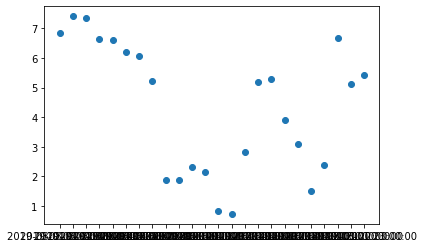

In [119]:
import matplotlib.pyplot as plt

plt.scatter(hourly_data_of_a_day['Datetime'],hourly_data_of_a_day['AC 1'] )
plt.show()

###now we will try to resample our data to daily average power used by every AC.



In [158]:
from pandas.errors import InvalidIndexError
#df['0'] =  pd.to_datetime(df['0'], infer_datetime_format=True)
#df['0'].resample('H').mean()
df['date'] = pd.to_datetime(df['0']).dt.date
df['Time'] = pd.to_datetime(df['0']).dt.time
format = '%Y-%m-%d %H:%M:%S'
#df['Datetime'] = pd.to_datetime(df['date'].astype("string") + ' ' + df['time'].astype("string"), format=format)
df['Datetime'] = pd.to_datetime(df['date'].astype("string")+ " " + df['Time'].astype("string"), format=format)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
%matplotlib inline
#df["AC"]=df["AC 1"].astype("int64")
newdf=df.resample('D').mean()
newdf
is_NaN = newdf.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = newdf[row_has_NaN]
print(rows_with_NaN)

            AC 1  AC 2  AC 3  AC 4  AC 5  ...  AC 14  AC 15  AC 16  AC 17  AC 18
Datetime                                  ...                                   
2019-08-15   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN
2019-08-16   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN
2019-08-18   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN
2019-08-20   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN
2019-08-21   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN
2019-08-22   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN
2019-08-23   NaN   NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN

[7 rows x 18 columns]


In [159]:
newdf.fillna(newdf.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


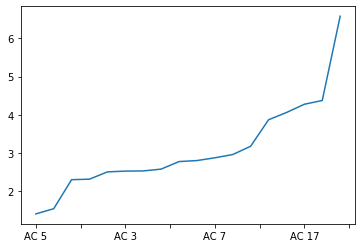

In [160]:
newdf.to_csv('daily_average_power_consumption.csv')
daily_avrg_power=pd.read_csv('/content/daily_average_power_consumption.csv')
mean_power=daily_avrg_power.mean()
mean_power.sort_values().plot()

###from this plot we can see that AC 18 has the highest average power consumption while AC 1 has lowest power consumption this means that with time AC becomes more inefficient and consumes more power.So by this we conclude that AC 18 is used the most and AC 1 is the least used AC.

###introducting the daily temperature tally for gurgaon

In [161]:
temp_gurgaon = pd.read_csv('/content/POWER_Point_Daily_20190108_20220217_028d4990N_077d0650E_LST.csv',on_bad_lines='skip')
temp_gurgaon.head()

,YEAR,MO,DY,T2M,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2019.0,8.0,1.0,31.62,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,8.0,2.0,30.80,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,8.0,3.0,29.40,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,8.0,4.0,29.08,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,8.0,5.0,31.56,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
temp_gurgaon.drop(['Unnamed: 4'	,'Unnamed: 5'	,'Unnamed: 6'	,'Unnamed: 7'	,'Unnamed: 8'	,'Unnamed: 9'],axis=1,inplace=True)

In [163]:
temp_gurgaon.head()

,YEAR,MO,DY,T2M
0,2019.0,8.0,1.0,31.62
1,2019.0,8.0,2.0,30.80
2,2019.0,8.0,3.0,29.40
3,2019.0,8.0,4.0,29.08
4,2019.0,8.0,5.0,31.56


###combining temperature data to daily average power consumption

In [164]:
temperature=temp_gurgaon["T2M"]
daily_avrg_power=daily_avrg_power.join(temperature)
daily_avrg_power.head()

,Datetime,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,T2M
0,2019-08-01,4.311540,7.192574,2.265024,3.307146,1.442734,2.799838,2.606356,3.257747,2.264021,1.761497,1.796930,2.539082,4.716520,3.064451,4.297616,3.620212,4.641762,7.560344,31.62
1,2019-08-02,3.977066,4.999364,2.907591,3.156443,1.642727,2.345898,2.332724,1.483780,2.637949,1.769729,2.011841,2.797132,5.121766,2.350529,4.469578,3.442201,4.446636,7.788578,30.80
2,2019-08-03,3.253671,4.289378,2.929867,1.904396,1.372613,2.554970,3.182347,1.291632,2.755750,1.463396,2.177836,3.078511,4.808684,1.866552,4.464492,2.929855,4.383972,7.881209,29.40
3,2019-08-04,4.176450,4.438933,2.615298,1.574643,1.554791,3.609023,2.849011,1.582269,2.542038,1.717022,1.855684,3.076877,4.996541,2.242965,4.684272,2.914741,4.555951,8.365449,29.08
4,2019-08-05,3.537644,4.014229,1.786723,0.906947,1.673323,3.795231,2.488733,1.644121,2.595709,1.427855,3.353972,3.113466,4.188769,2.794521,5.008207,3.470436,3.817964,6.120253,31.56


In [165]:
sorted_df=daily_avrg_power.sort_values(by='T2M')
sorted_df.head()

,Datetime,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,T2M
59,2019-09-29,1.132653,2.359240,2.293503,1.710039,1.022903,0.996512,1.870239,1.583362,2.648088,1.379156,1.935750,1.840952,3.127572,2.300961,2.768628,1.925728,3.441793,5.535383,26.76
60,2019-09-30,1.592023,3.347022,2.559568,1.613026,0.958841,0.710229,1.613038,2.240627,3.060209,1.229915,1.740658,2.359368,2.987857,2.420771,2.971220,1.902282,3.495015,5.609178,27.01
58,2019-09-28,1.188394,3.230469,1.857703,1.518658,1.303605,2.196835,1.875569,2.326566,2.441655,1.307576,1.825910,2.299872,3.185432,2.727346,3.126220,2.436385,3.241970,4.268508,27.05
56,2019-09-26,3.505424,4.150916,2.649812,3.377233,1.446479,2.303976,2.059038,2.279011,2.928348,1.457241,3.164544,2.497027,4.915745,2.815884,4.510031,2.579690,4.333612,6.375625,27.10
57,2019-09-27,2.293937,3.281382,1.659542,2.619944,0.887876,2.359837,2.292260,2.892139,2.426224,1.260501,2.440704,2.530993,4.243421,2.705361,3.960301,2.214283,4.264746,6.890066,27.44


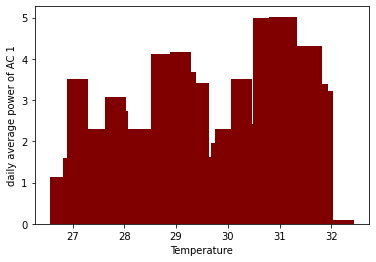

In [166]:
import matplotlib.pyplot as plt

plt.bar(sorted_df["T2M"], sorted_df["AC 1"], color ='maroon',
        width = 0.4)
 
plt.xlabel("Temperature")
plt.ylabel("daily average power of AC 1")
plt.show()

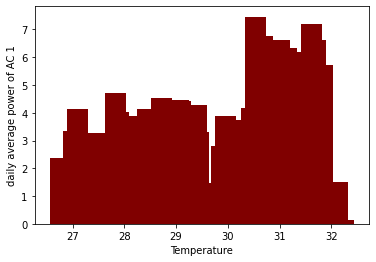

In [167]:
plt.bar(sorted_df["T2M"], sorted_df["AC 2"], color ='maroon',
        width = 0.4)
 
plt.xlabel("Temperature")
plt.ylabel("daily average power of AC 1")
plt.show()

### the power consumption increase along with the air temperature rise due to additional consumption for air conditioning.

###Now we try to predict the power consumption on the basis of temperature

In [168]:
X = daily_avrg_power["T2M"].values
Y = daily_avrg_power["AC 1"].values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.5,random_state=2,shuffle=True)

In [170]:

xtrain= xtrain.reshape(-1, 1)
ytrain= ytrain.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)
ytest=ytest.reshape(-1,1)

#linnear Regression

#from sklearn.linear_model import LinearRegression

#regressor = LinearRegression()
#regressor.fit(xtrain,ytrain)

#y_pred = regressor.predict(xtest)
ytrain
np.any(np.isnan(ytrain))
daily_avrg_power.isnull().sum()

Datetime    0
AC 1        0
AC 2        0
AC 3        0
AC 4        0
AC 5        0
AC 6        0
AC 7        0
AC 8        0
AC 9        0
AC 10       0
AC 11       0
AC 12       0
AC 13       0
AC 14       0
AC 15       0
AC 16       0
AC 17       0
AC 18       0
T2M         0
dtype: int64

In [174]:
from sklearn.neighbors import KNeighborsRegressor
kmodel = KNeighborsRegressor(n_neighbors=20)
kmodel.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=20)

In [175]:
ytrain_pred = kmodel.predict(xtrain)
ytest_pred=kmodel.predict(xtest)
print(ytrain.shape)
print(ytrain_pred.shape)

(30, 1)
(30, 1)


In [176]:
kmodel.score(xtrain,ytrain)

-0.010299627839810421

In [178]:
from sklearn import linear_model
lmodel = linear_model.LinearRegression()

lmodel.fit(xtrain,ytrain)
print(lmodel.score(xtrain,ytrain))
print(lmodel.score(xtest,ytest))


0.014266112211423487
-0.018460860447840455


###Here the algorithm is giving us a negative score because the temperature dataset is randomly taken from the internet and is too small for a prediction and thats why our dataset is unfit for these algorithms. The dataset online was only given in the form of daily basis so i would request you to please provide a better complied and larger dataset for temperature.
 